# **<font color=white> 02.3-sigma Rule & Box plot Code 실습**

[목적]
  - Anomaly Detection의 기초
  - Univariate variable (단변량)일 때 사용
  - 시각적으로 판단가능함
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [1]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=1b1ec043b94d4b1f8ae8ba1267095cd8a01950dd4a363ffbaf07828e0758f7c4
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pyod.utils.data import generate_data, get_outliers_inliers

In [3]:
# Data Loading
X, Y = generate_data(behaviour='new', n_features=10, 
                     train_only=True,
                     contamination=0.1,
                     random_state=2023)

In [4]:
X

array([[ 8.14712454,  6.59528228,  6.35355847, ...,  7.23050906,
         7.45741768,  6.91669978],
       [ 6.87217796,  6.59644768,  7.34971009, ...,  7.21802974,
         7.81960358,  6.56356235],
       [ 6.91046488,  5.85682661,  6.49570133, ...,  6.82231588,
         7.47585203,  7.10680777],
       ...,
       [ 4.51696673, -5.64801092, -5.3305938 , ..., -0.23473631,
         1.9417748 ,  5.09580244],
       [ 2.223976  , -4.29540408,  2.19216752, ...,  2.54007832,
        -5.53053477,  5.88465653],
       [-2.66498659,  3.5250092 ,  1.69573986, ..., -5.31729594,
         5.94561255,  6.61914717]])

In [5]:
# Naming for columns
col_list = []
for i in range(X.shape[1]):
    a = 'X{}'.format(i+1)
    print(a)
    col_list.append(a)

X1
X2
X3
X4
X5
X6
X7
X8
X9
X10


In [ ]:
# Columns Name
col_list

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']

In [6]:
# Make DF
df = pd.DataFrame(X, columns = col_list)
df['Y'] = Y

In [7]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,8.147125,6.595282,6.353558,6.653506,8.134808,7.426514,6.474067,7.230509,7.457418,6.916700,0.0
1,6.872178,6.596448,7.349710,7.097543,7.024347,6.615302,6.753538,7.218030,7.819604,6.563562,0.0
2,6.910465,5.856827,6.495701,6.598612,8.042650,6.205240,7.024534,6.822316,7.475852,7.106808,0.0
3,6.901166,6.942458,6.354764,6.447391,6.595218,7.941335,6.104982,6.930397,8.076817,7.715245,0.0
4,7.465372,6.305800,7.858624,6.456638,7.610647,6.530033,7.509274,7.636209,7.650121,7.043726,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.018529,5.163813,5.468692,-2.640285,-0.578817,1.487439,2.359938,-6.462774,2.466932,1.323520,1.0
996,3.328107,0.614357,5.886779,6.717434,2.906959,-6.980421,2.245124,-2.790132,-4.169568,0.832299,1.0
997,4.516967,-5.648011,-5.330594,-6.352683,-1.796092,5.129173,3.517025,-0.234736,1.941775,5.095802,1.0
998,2.223976,-4.295404,2.192168,1.202558,5.348682,3.638888,5.204538,2.540078,-5.530535,5.884657,1.0


Text(0.5, 1.0, 'Ground Truth')

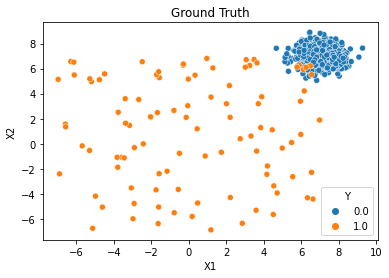

In [8]:
# Data 분포 확인하기 X1, X2
sns.scatterplot(x='X1', y='X2', hue='Y', data=df);
plt.title('Ground Truth')

[3-Sigma Rule]

* 사용방법
```
# 데이터의 분포를 정규분포로 가정하고, 평균으로부터 (표준편차 x 시그마 계수σ)를 벗어나면 아웃라이어라고 판단함
# 시그마 계수(σ)
```

* 현업사례
```
# 공정 센서 데이터 이상탐지
# 검사 및 측정 데이터 이상탐지 
```

In [ ]:
# ▶ UCL, LCL 생성
df['UCL_X1'] = df['X1'].mean() + 1*df['X1'].std()
df['LCL_X1'] = df['X1'].mean() - 1*df['X1'].std()

df['UCL_X2'] = df['X2'].mean() + 1*df['X2'].std()
df['LCL_X2'] = df['X2'].mean() - 1*df['X2'].std()

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y,UCL_X1,LCL_X1,UCL_X2,LCL_X2
0,8.147125,6.595282,6.353558,6.653506,8.134808,7.426514,6.474067,7.230509,7.457418,6.916700,0.0,8.787653,3.864185,8.714817,4.116582
1,6.872178,6.596448,7.349710,7.097543,7.024347,6.615302,6.753538,7.218030,7.819604,6.563562,0.0,8.787653,3.864185,8.714817,4.116582
2,6.910465,5.856827,6.495701,6.598612,8.042650,6.205240,7.024534,6.822316,7.475852,7.106808,0.0,8.787653,3.864185,8.714817,4.116582
3,6.901166,6.942458,6.354764,6.447391,6.595218,7.941335,6.104982,6.930397,8.076817,7.715245,0.0,8.787653,3.864185,8.714817,4.116582
4,7.465372,6.305800,7.858624,6.456638,7.610647,6.530033,7.509274,7.636209,7.650121,7.043726,0.0,8.787653,3.864185,8.714817,4.116582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.018529,5.163813,5.468692,-2.640285,-0.578817,1.487439,2.359938,-6.462774,2.466932,1.323520,1.0,8.787653,3.864185,8.714817,4.116582
996,3.328107,0.614357,5.886779,6.717434,2.906959,-6.980421,2.245124,-2.790132,-4.169568,0.832299,1.0,8.787653,3.864185,8.714817,4.116582
997,4.516967,-5.648011,-5.330594,-6.352683,-1.796092,5.129173,3.517025,-0.234736,1.941775,5.095802,1.0,8.787653,3.864185,8.714817,4.116582
998,2.223976,-4.295404,2.192168,1.202558,5.348682,3.638888,5.204538,2.540078,-5.530535,5.884657,1.0,8.787653,3.864185,8.714817,4.116582


<AxesSubplot:xlabel='X2', ylabel='Density'>

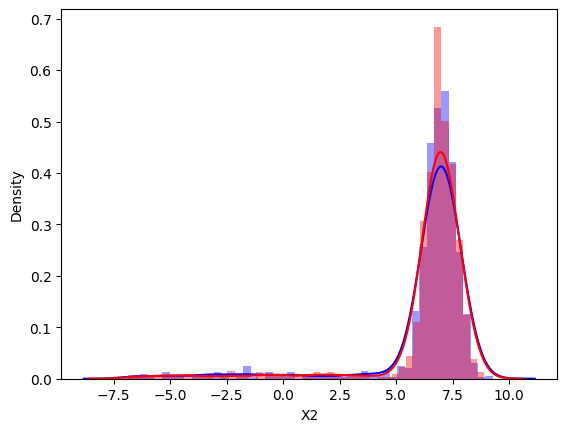

In [ ]:
sns.distplot(df['X1'], color = 'blue', label = 'X1')
sns.distplot(df['X2'], color = 'red', label = 'X2')

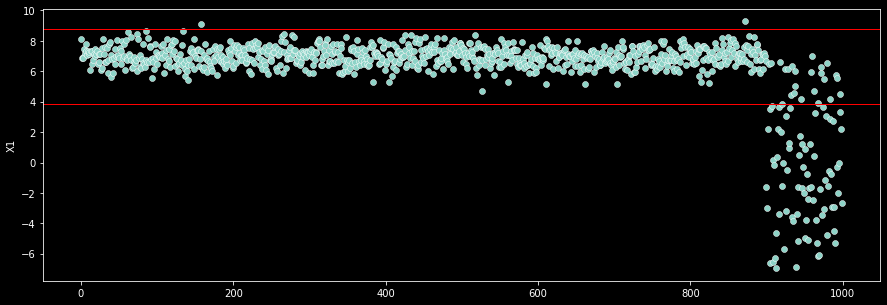

In [ ]:
# X1 Plotting
%matplotlib inline
plt.style.use(['dark_background'])

sns.scatterplot(x=list(df.index), y=df['X1']);
plt.axhline(y=df['UCL_X1'][0], color='r', linewidth=1)
plt.axhline(y=df['LCL_X1'][0], color='r', linewidth=1)
plt.gcf().set_size_inches(15, 5)

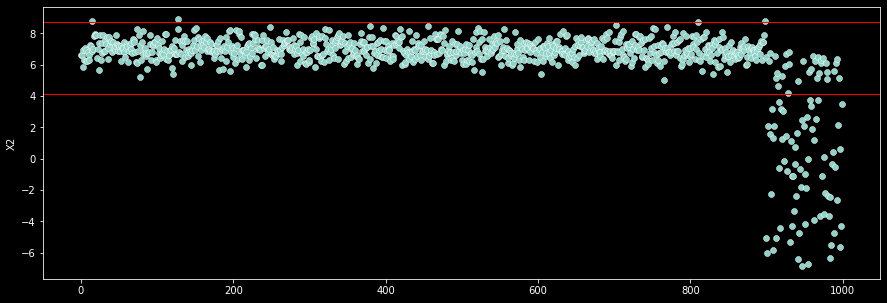

In [ ]:
# X2 Plotting
%matplotlib inline
plt.style.use(['dark_background'])

sns.scatterplot(x=list(df.index), y=df['X2']);
plt.axhline(y=df['UCL_X2'][0], color='r', linewidth=1)
plt.axhline(y=df['LCL_X2'][0], color='r', linewidth=1)
plt.gcf().set_size_inches(15, 5)

[Box plot]
* 사용방법
```
# 주어진 데이터에서 각 사분위수를 계산한다.
# 그래프에서 제 1사분위수와 제 3사분위수를 기준으로 박스를 그린다.
# 제 2사분위수에 해당하는 위치에 선을 긎는다.
# 제 3사분위수에서 1.5IQR을 더한 위치에 가로 선을 긎고 제 3사분위수부터 가로선까지 세로선을 긎는다.
# 제 1사분위수에서 1.5IQR을 뺀 위치에 가로 선을 긎고 제 1사분위수부터 가로선까지 세로선을 긎는다.
#4,5번에 그은 직선을 넘어서는 위치에 존재하는 값은 동그라미와 같은 기호로 표시한다.(이상치 의미) 
```

* 용어
```
# median - 중앙값
# IQR : 25% ~ 75%에 해당한 부분 
# 75th Percentile : 제 3사분위수
# 25th Percentile : 제 1사분위수
# Whisker : 최댓값, 최솟값
# Outlier : 이상치 (Q3+1.5 IQR, Q1-1.5 IQR)
```


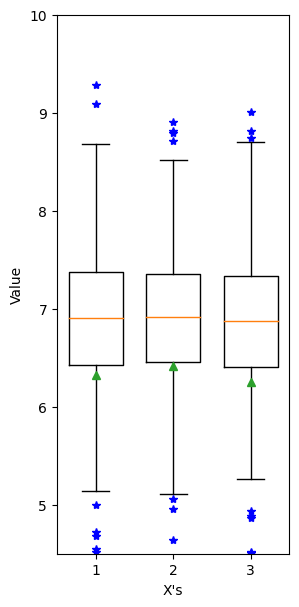

In [9]:
# ▶ Box plot 그려보기
plt.style.use(['default'])
labels = ['X1', 'X2', 'X3']

fig, ax = plt.subplots(figsize=(3,7)) ;
box = ax.boxplot([df['X1'], df['X2'], df['X3']], widths=0.7, sym='b*', showmeans=True);
ax.set_ylim(4.5, 10.0);
ax.set_xlabel("X's");
ax.set_ylabel('Value');